# **LOAN APPROVAL PREDICTION**

### PROBLEM STATEMENT

In the current era of digital banking, financial institutions are increasingly turning to data-driven approaches to streamline their loan approval processes. Traditionally, loan approvals are handled manually based on fixed rules and human judgment, which can be time-consuming and prone to inconsistency. This project aims to develop a machine learning model that predicts whether a loan application should be approved or not based on various applicant attributes such as income, credit history, employment status, and loan amount.

The primary goal is to assist financial institutions in making faster and more accurate loan decisions, reducing the risk of default and improving customer satisfaction. The model should learn from historical loan data and identify patterns that distinguish approved applications from rejected ones.

### DOMAIN ANALYSIS

**Domain**: Banking and Financial Services.

The banking and finance sector is highly data-driven, involving critical decisions like credit scoring, fraud detection, risk analysis, and loan disbursement. One of the key challenges faced by banks and financial institutions is accurately predicting whether a loan applicant is creditworthy. Traditionally, this has involved manual assessment based on credit history, income, and other financial documents.

With the rise of machine learning and artificial intelligence, there is a shift toward automated, data-driven loan approval systems that can reduce turnaround time, enhance decision accuracy, and minimize default risks.

Typical loan application data includes:

>Applicant demographics: Gender, Marital Status, Education

>Financial details: Income, Loan Amount, Credit History

>Employment: Job type, Self-employed status

>Property details: Property area

>Loan specifics: Term, Co-applicant income, Dependents

This structured data allows machine learning algorithms to find patterns and make data-driven predictions.

## 1. IMPORTING LIBRARIES

In [5]:
# Importing pandas library for working with data sets
import pandas as pd

# Importing numpy library for working with arrays
import numpy as np

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# Importing seaborn library for advanced visualization
import seaborn as sns

# Importing warnings for disable warnings from the code
import warnings
# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing LabelEncoder for encoding
from sklearn.preprocessing import LabelEncoder

# StandardScaler for feature scaling to bring values within a specific range
from sklearn.preprocessing import StandardScaler

# Importing train_test_split for splitting data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing an ensemble model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing an advanced boosting model GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing performance metrics for model evaluation
# accuracy_score,confusion_matrix,classification_report,etc.
from sklearn.metrics import *

## 2. LOADING THE DATA

In [8]:
df = pd.read_csv('loan_approved.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
df.shape

(614, 13)

## 3. BASIC CHECKS

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [23]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

## 4. EXPLORATIVE DATA ANALYSIS

In [26]:
#Helps us understand the shape, spread, and skewness of each feature individually.

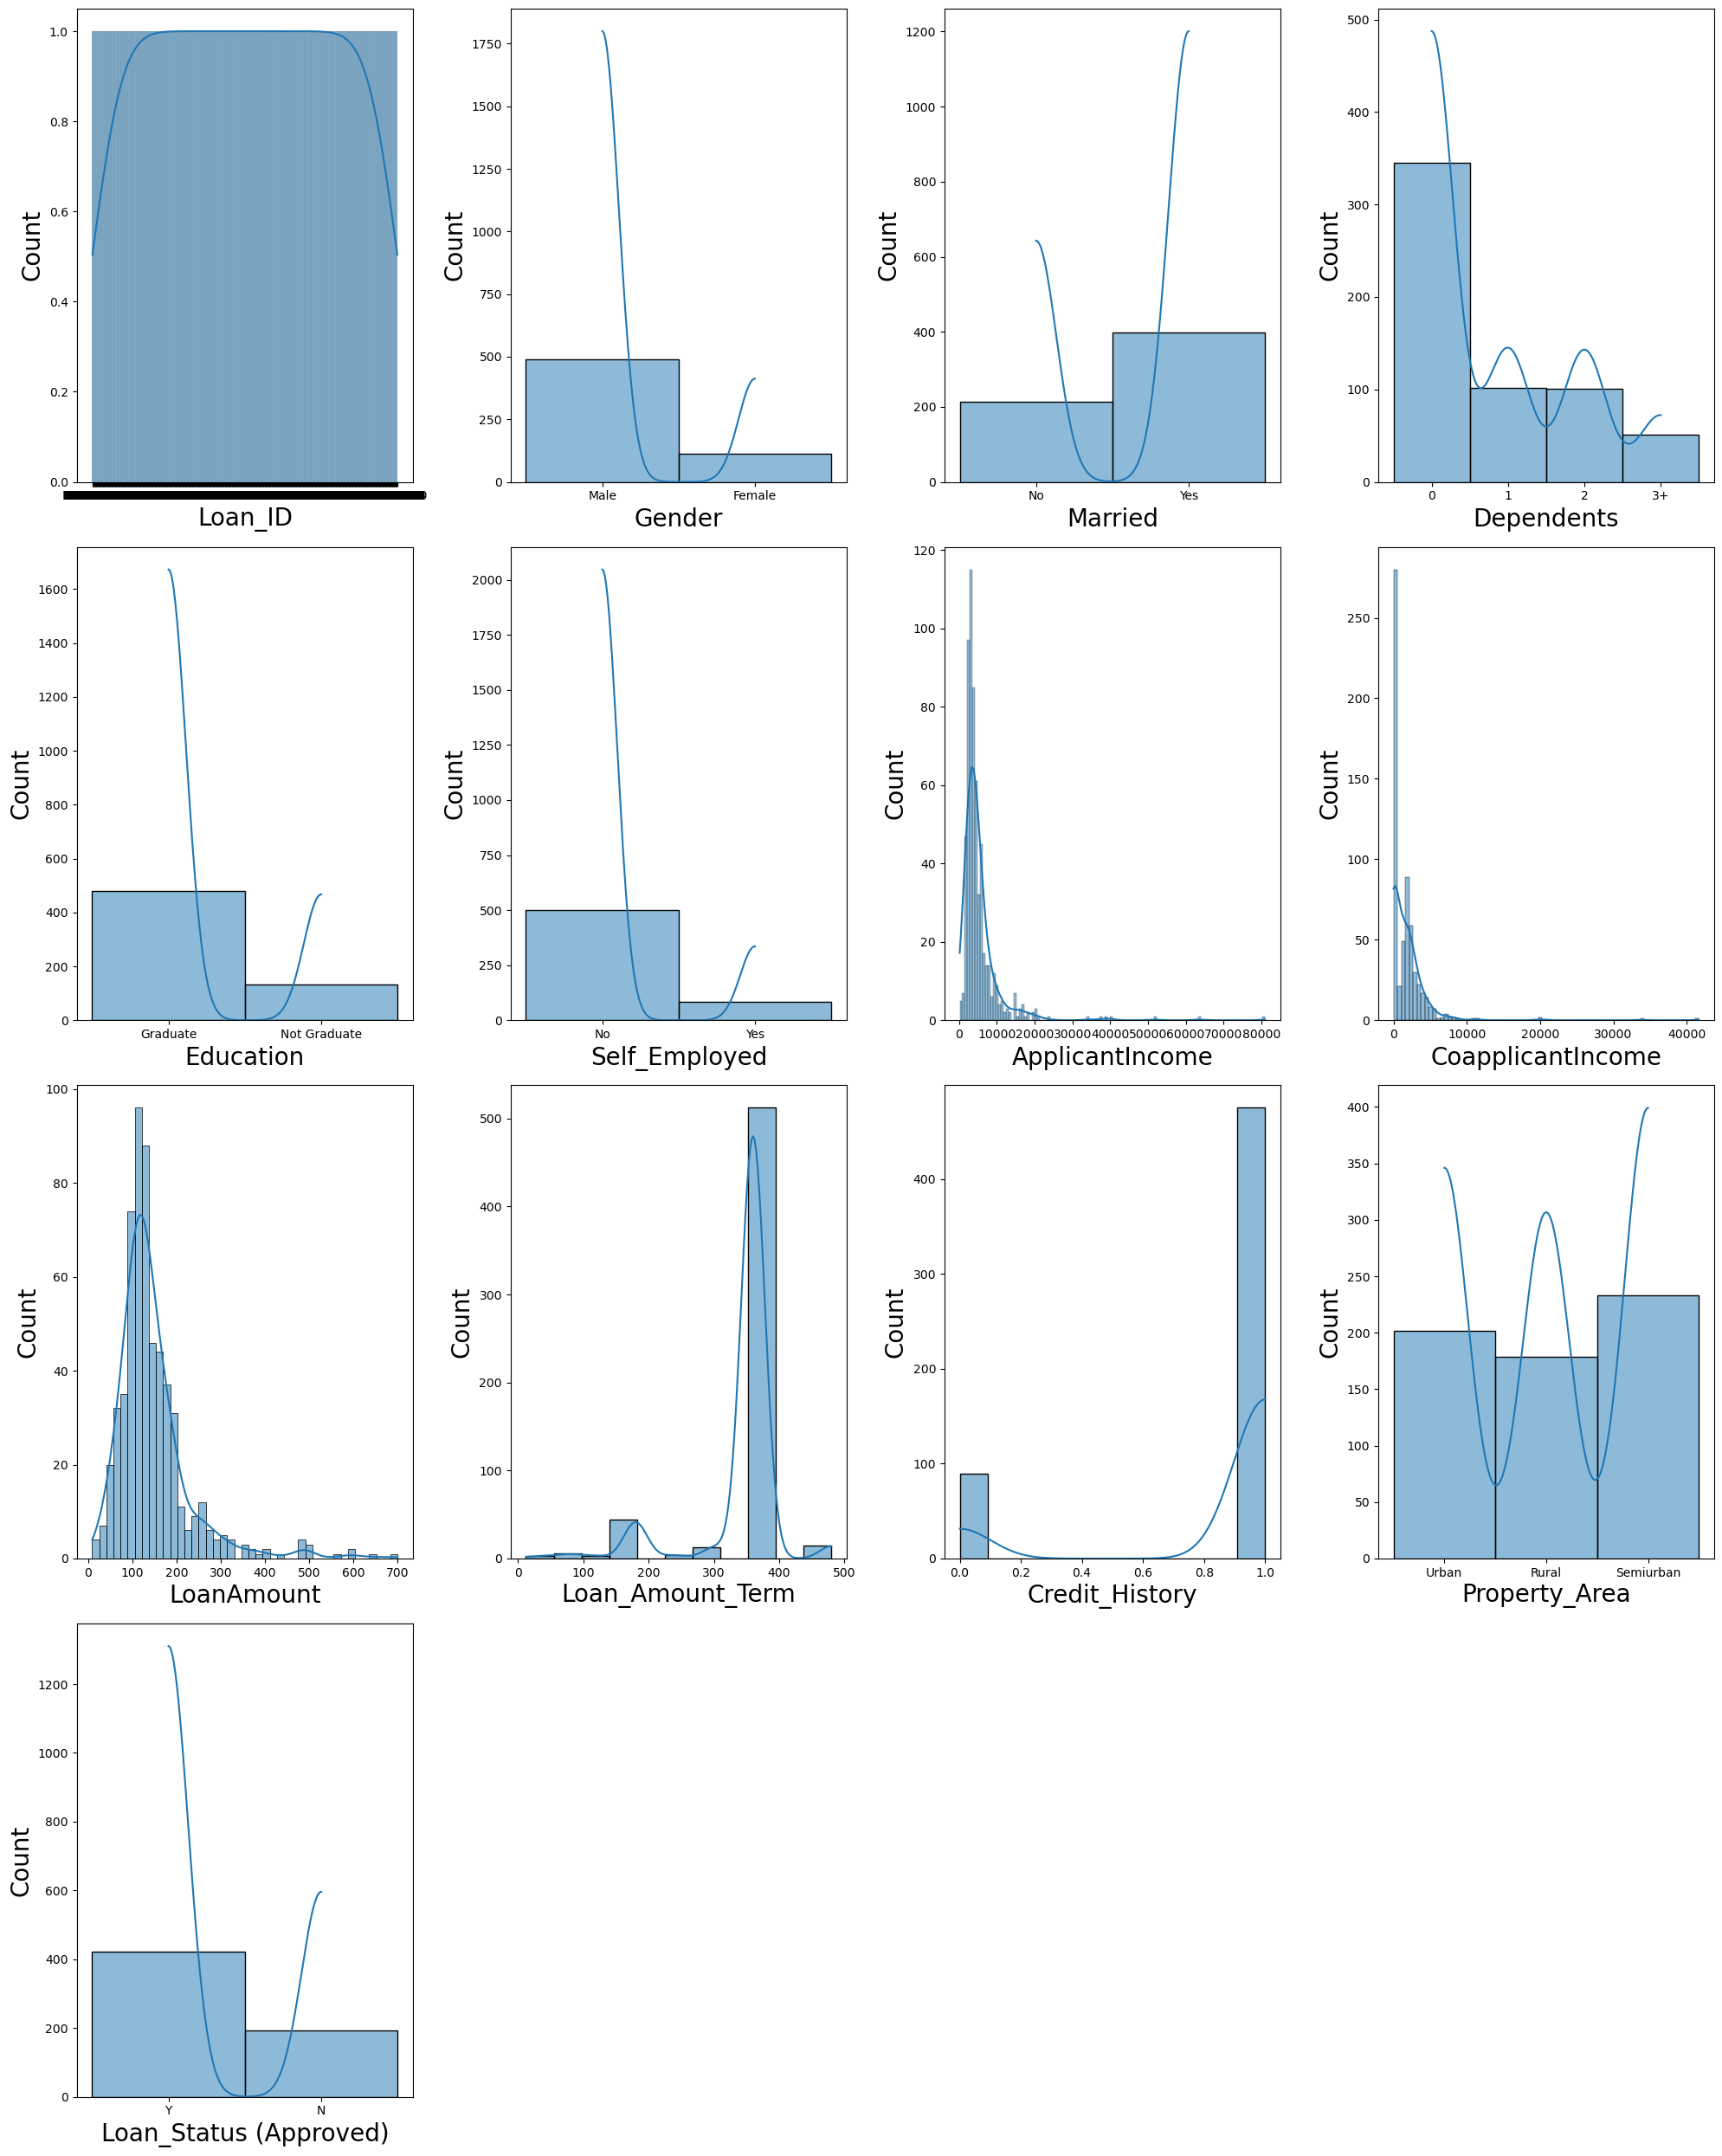

In [28]:
# Univariate Analysis
plt.figure(figsize = (20,25), facecolor = 'white') # outer boundaries
plotnumber = 1

for column in df.columns:
  plt.subplot(4,4,plotnumber)
  sns.histplot(df[column], kde = True)
  plt.xlabel(column, fontsize = 20)
  plt.ylabel('Count', fontsize = 20)
  plotnumber += 1
plt.tight_layout()

### What kind of inferences can we draw?
**Numerical Columns**
(e.g., ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

>Normal Distribution: If the histogram looks bell-shaped → distribution is normal → good for models like linear regression.

>Right Skewed: If most values are on the left → indicates few applicants have very high income/loan → might need log transformation.

>Outliers: Unusual spikes far from the main bulk → you might consider handling them.

Example Inference:
"ApplicantIncome is right-skewed — most applicants earn between 2,000–5,000, but a few earn over 30,000."

**Categorical Columns**
(e.g., Gender, Married, Education, Self_Employed, Credit_History,Loan_Status, Dependents)

>Bar-Like Histograms: Shows frequency of each category.

>Class Imbalance: If one bar is significantly taller, it means the column is imbalanced.
E.g., Credit_History: if most values are 1.0 → credit history is good for most.
E.g., Loan_Status: if most values are Y → most loans were approved.

Example Inference:
"Most applicants are graduates and not self-employed. There is a class imbalance in the loan approval status, with more approvals (Y) than denials (N)."



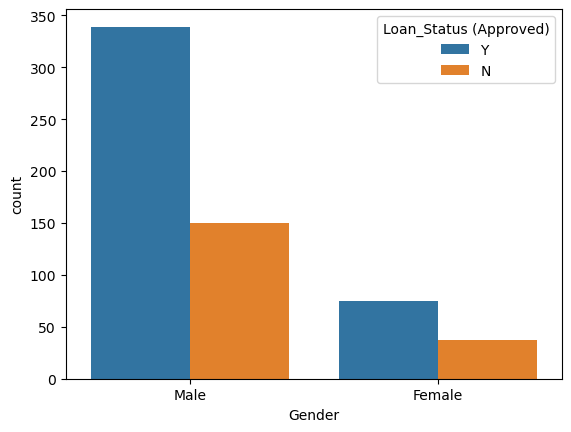

In [30]:
#bivariate analysis
#CATEGORICAL FEATURES ANALYSIS
#Purpose: Do males or females get approved more?
sns.countplot(x='Gender',hue='Loan_Status (Approved)',data=df)
plt.show()

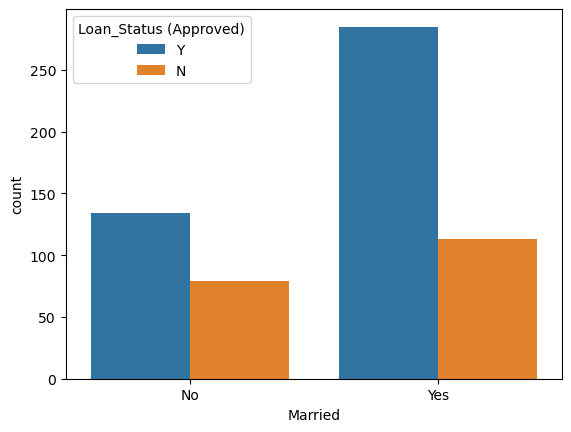

In [31]:
#Does being married affect approval?
sns.countplot(x='Married',hue='Loan_Status (Approved)',data=df)
plt.show()

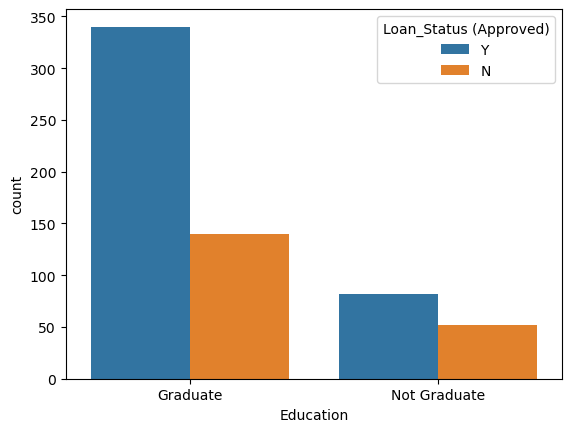

In [32]:
#Are graduates more likely to get approved?
sns.countplot(x='Education',hue='Loan_Status (Approved)',data=df)
plt.show()

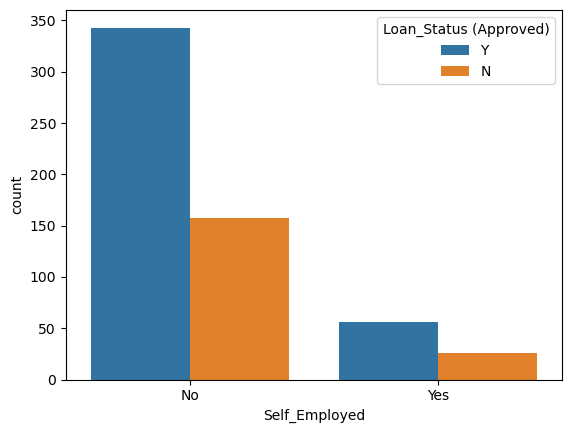

In [33]:
#Are salaried people preferred for loans?
sns.countplot(x='Self_Employed',hue='Loan_Status (Approved)',data=df)
plt.show()

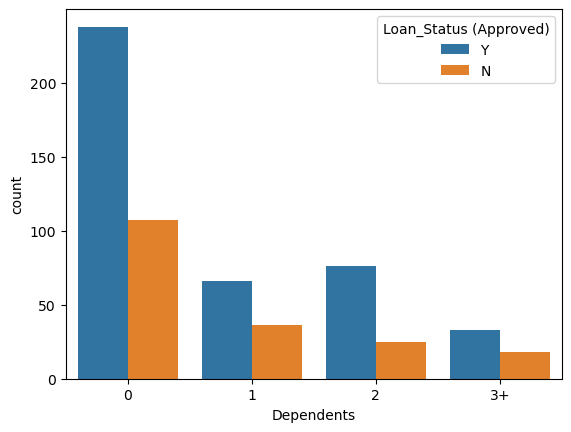

In [34]:
#Do dependents affect approval?
sns.countplot(x='Dependents',hue='Loan_Status (Approved)',data=df)
plt.show()


<Axes: xlabel='count', ylabel='Property_Area'>

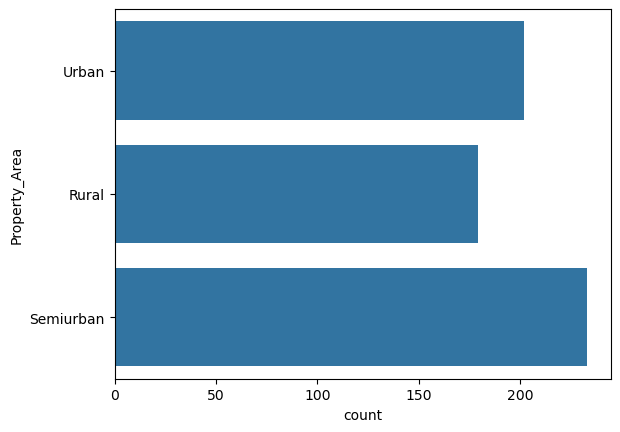

In [35]:
sns.countplot(df['Property_Area'])

<Axes: xlabel='count', ylabel='Loan_Status (Approved)'>

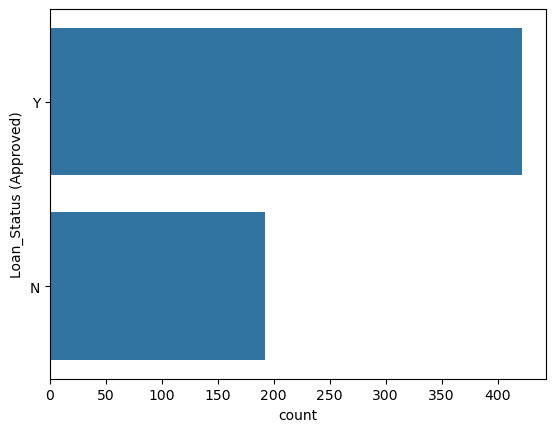

In [36]:
sns.countplot(df['Loan_Status (Approved)'])

In [37]:
#NUMERICAL FEATURES ANALYSIS

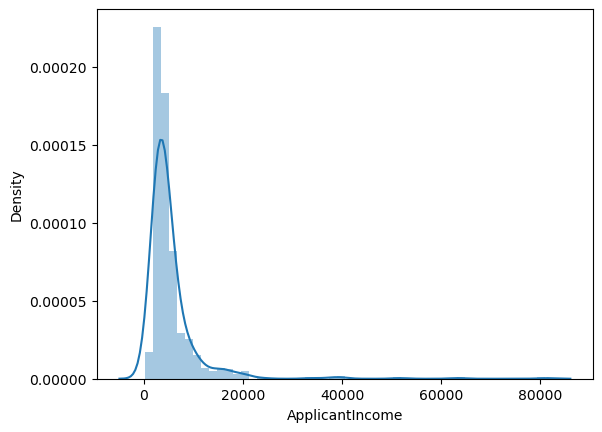

In [47]:

sns.distplot(df["ApplicantIncome"])
plt.show()

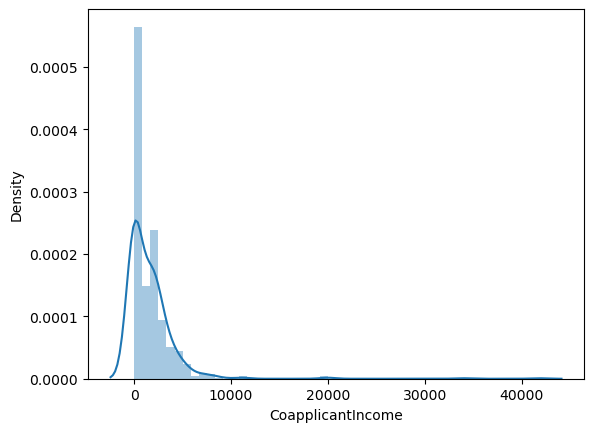

In [49]:
sns.distplot(df["CoapplicantIncome"])
plt.show()

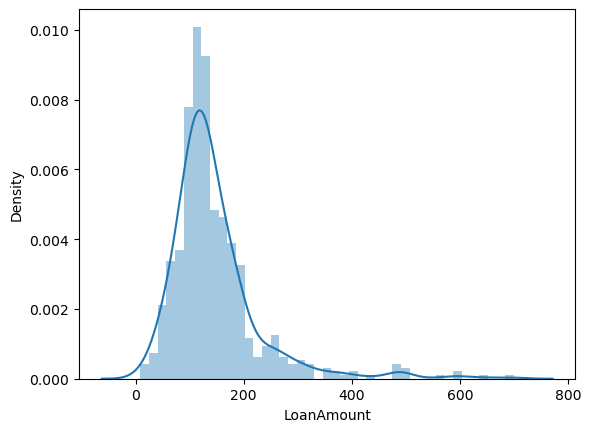

In [51]:
sns.distplot(df["LoanAmount"])
plt.show()

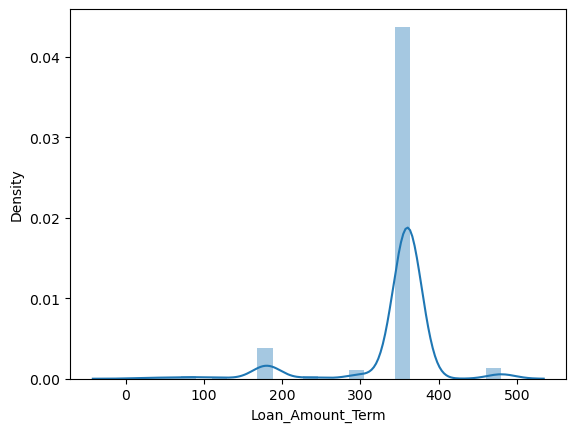

In [52]:
sns.distplot(df["Loan_Amount_Term"])
plt.show()

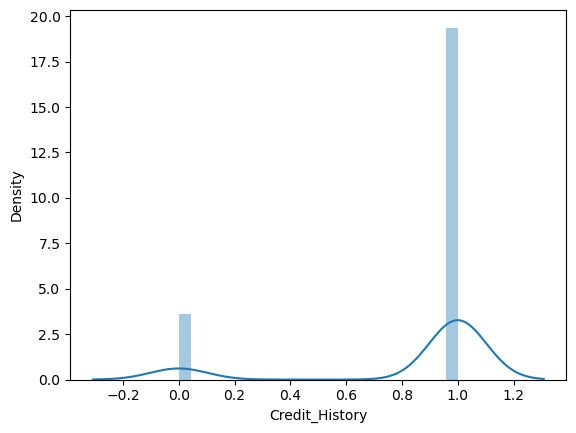

In [55]:
sns.distplot(df["Credit_History"])
plt.show()

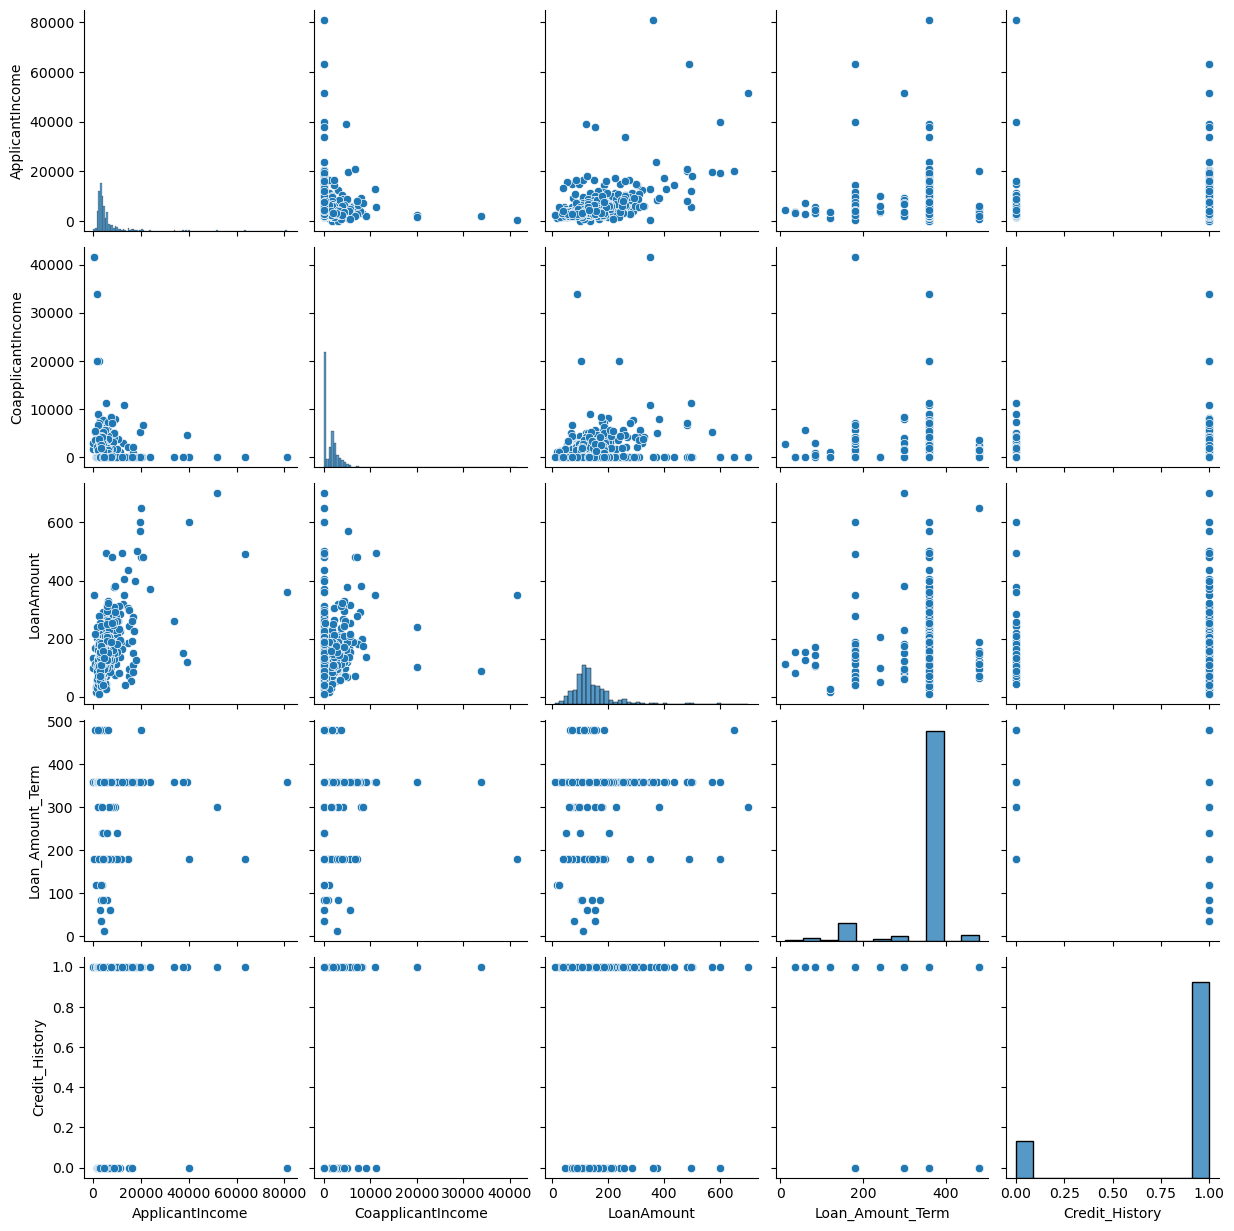

In [57]:
#multivariate analysis
sns.pairplot(df)

### 5. DATA PREPROCESSING AND FEATURE ENGINEERING

In [60]:
#HANDLING MISSING VALUES

df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [62]:
for i in df.columns:
  if df[i].dtypes == 'object':
    df[i].fillna(df[i].mode()[0], inplace = True)
  else:
    df[i].fillna(df[i].median(), inplace = True)

In [64]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [66]:
#HANDLING DUPLICATED VALUES

df.duplicated().sum()

0

In [68]:
#Loan_ID is a Unique Identifier — Not Useful for Prediction. So droping it
df.drop('Loan_ID', axis = 1, inplace = True)

In [70]:
#ENCODING
col2 = df.select_dtypes(include = ['object']).columns
col2

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status (Approved)'],
      dtype='object')

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col2:
  df[i] = le.fit_transform(df[i])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


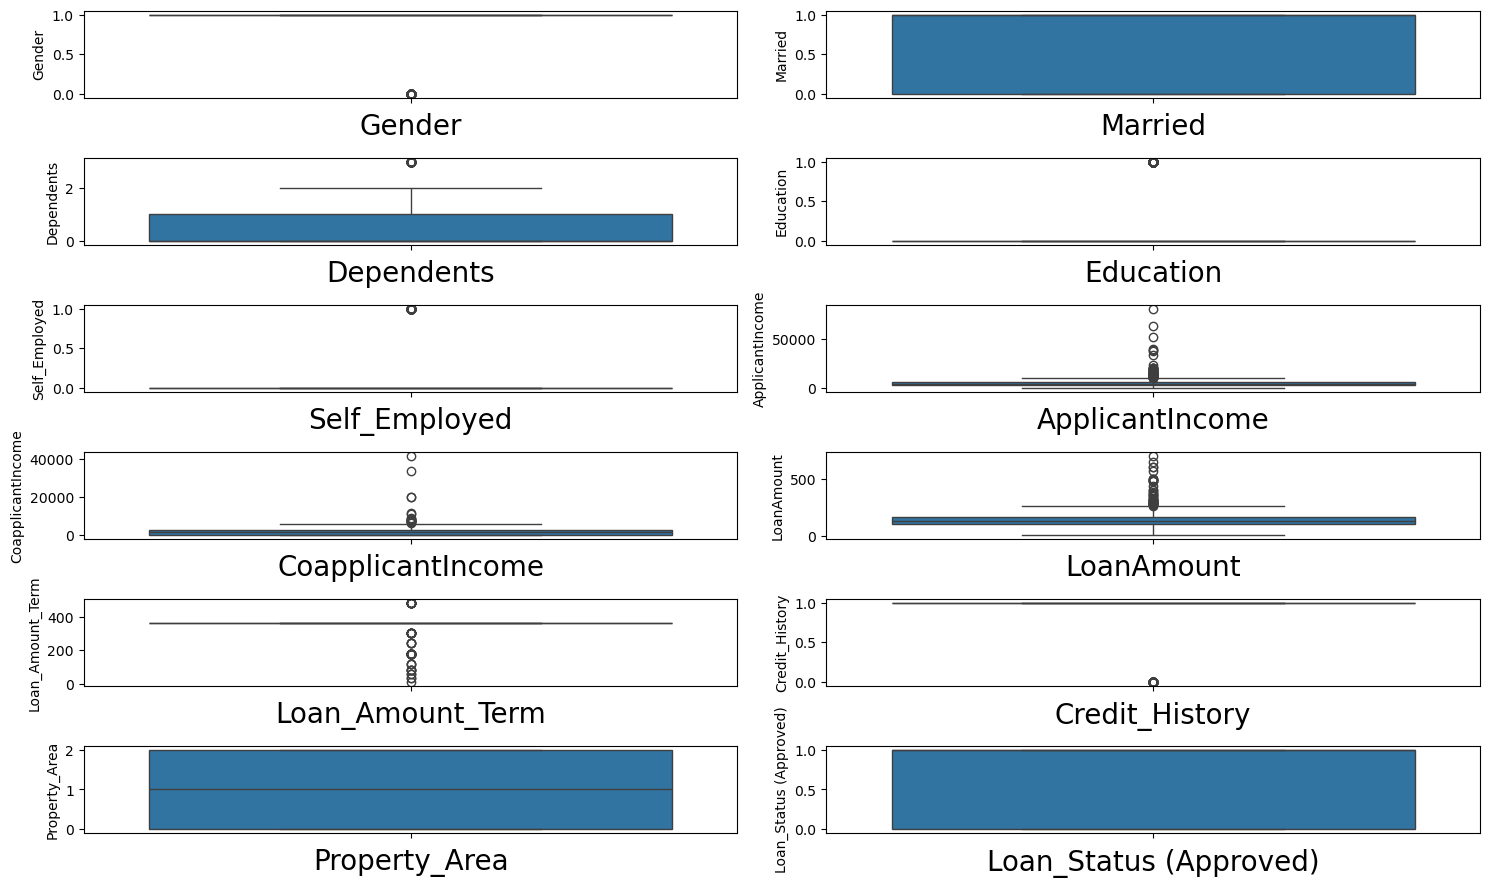

In [74]:
#CHECKING OUTLIERS

plt.figure(figsize = (15,10), facecolor = 'white') # outer boundaries
plotnumber = 1
for i in df.columns:
  plt.subplot(7,2, plotnumber)
  sns.boxplot(df[i])
  plt.xlabel(i, fontsize = 20)
  plotnumber += 1
plt.tight_layout()

In [76]:
#HANDILING OUTLIERS
#Here 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are values with high amount. so using transformation 
## TRANSFORMATION TECHINIQUE: Used to reduce outliers and skewness and makes the graph look normal.

## We are going to apply IQR based clipping/ clamping + Log transformation
col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for i in col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # define the lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # first cap upper outliers
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

  # then cap lower outliers
  df[col] = np.where(df[col]< lower_bound, lower_bound, df[col])
  df[col] = np.log1p(df[col]) # log transformation technique


In [78]:
#now next column which have outliers is 'Loan_Amount_Term'
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [80]:
#since this is discrete we don't need to use log
col = ['Loan_Amount_Term'] 
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

## define the lower and upper bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# first cap upper outliers
df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# then cap lower outliers
df[col] = np.where(df[col]< lower_bound, lower_bound, df[col])

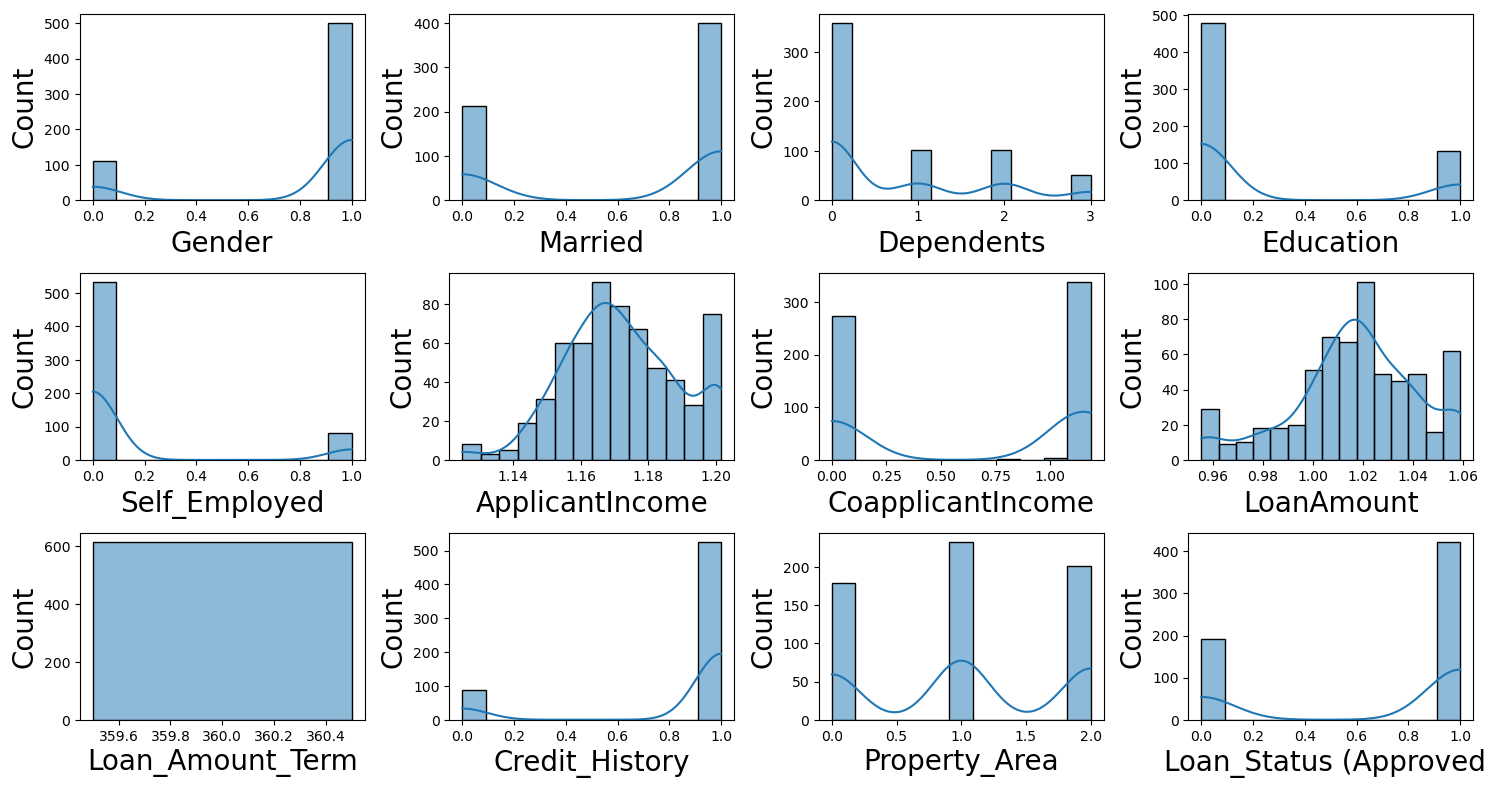

In [82]:
#After handling its outliers , now we can view it by histplot and also boxplot
plt.figure(figsize = (15,10), facecolor = 'white')
plotnumber = 1
for i in df.columns:
  plt.subplot(4,4, plotnumber)
  sns.histplot(df[i], kde = True)
  plt.xlabel(i, fontsize = 20)
  plt.ylabel('Count', fontsize = 20)
  plotnumber += 1
plt.tight_layout()

In [83]:
#here we can see that 'ApplicantIncome' , 'LoanAmount' become as normal distribution which is good for modelling.

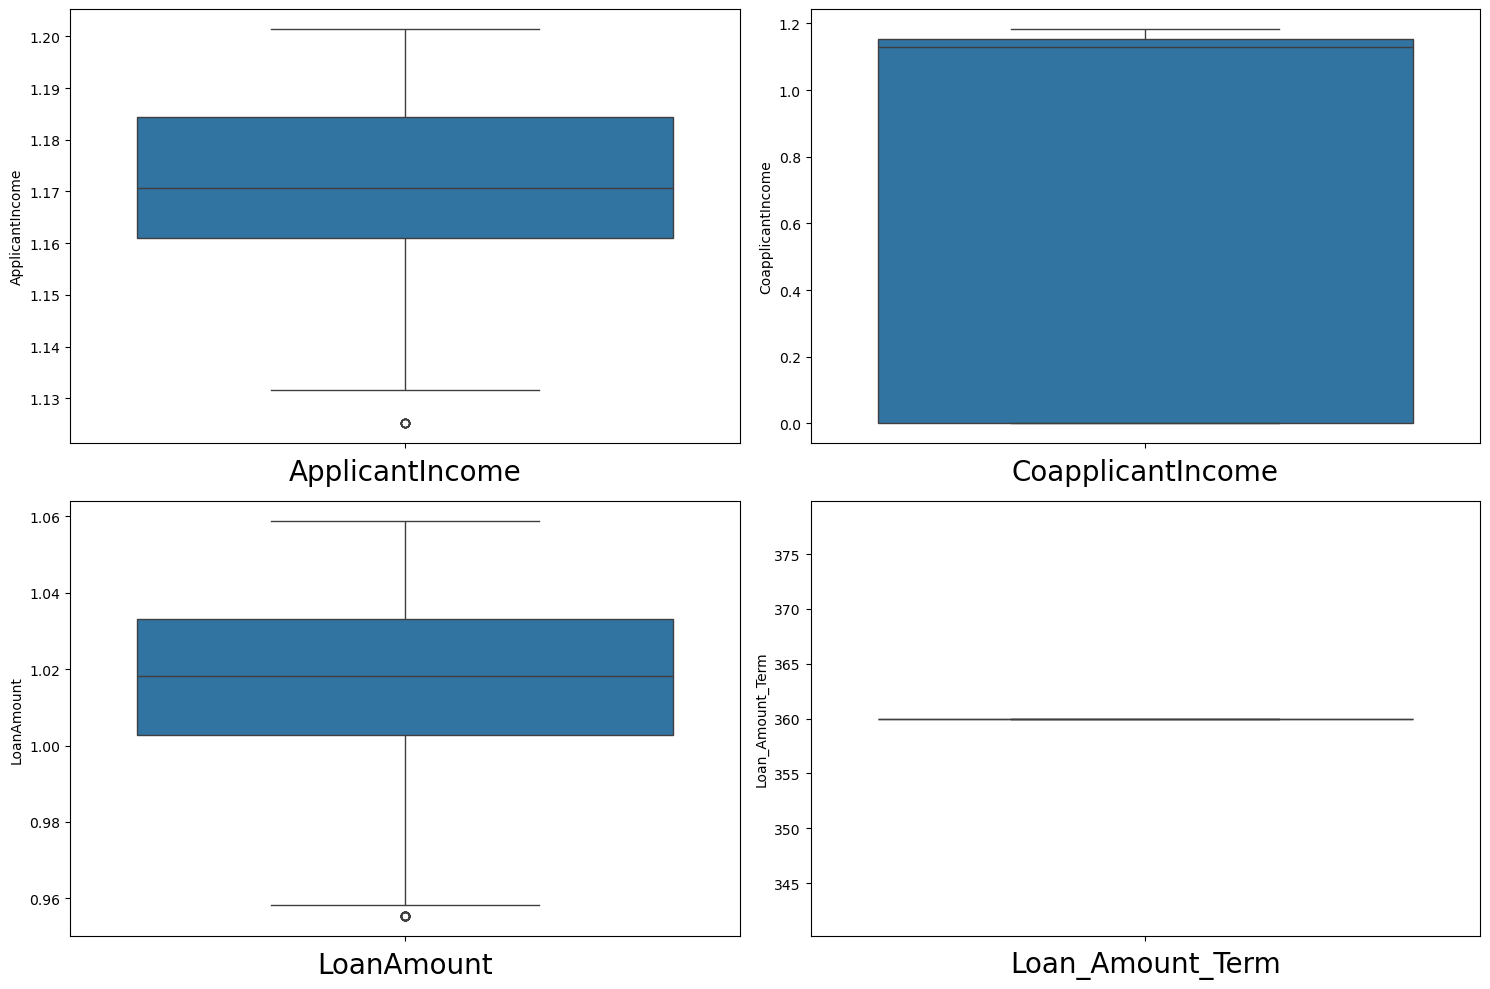

In [84]:
#To view it in Box plot
col = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
plt.figure(figsize = (15,10), facecolor = 'white') # outer boundaries
plotnumber = 1
for i in col:
  plt.subplot(2,2, plotnumber)
  sns.boxplot(df[i])
  plt.xlabel(i, fontsize = 20)
  plotnumber += 1
plt.tight_layout()

In [88]:
#now we can view that the outliers are gone

In [90]:
# SCALING
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in df.columns[:-1]:
  df[i] = ss.fit_transform(df[[i]])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.737559,-1.116955,0.056693,0.0,0.411733,1.223298,1
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.273828,0.871899,0.056693,0.0,0.411733,-1.318513,0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.570260,-1.116955,-1.683846,0.0,0.411733,1.223298,1
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.880894,0.900988,-0.101423,0.0,0.411733,1.223298,1
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.785137,-1.116955,0.289467,0.0,0.411733,1.223298,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.640031,-1.116955,-1.478273,0.0,0.411733,-1.318513,1
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.059731,-1.116955,-2.438534,0.0,0.411733,-1.318513,1
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.327143,0.726326,1.598060,0.0,0.411733,1.223298,1
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.214717,-1.116955,0.941562,0.0,0.411733,1.223298,1


### 6. FEATURE ENGINEERING

In [93]:
#Actually if we see in boxplot, it shows that all datas in Loan_amount_term is outliers. so after removing it , we don't have any values in it.
df['Loan_Amount_Term'].unique()

array([0.])

In [95]:
#so dropping it from the dataset
df.drop('Loan_Amount_Term', axis = 1, inplace = True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status (Approved)
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.737559,-1.116955,0.056693,0.411733,1.223298,1
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.273828,0.871899,0.056693,0.411733,-1.318513,0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.570260,-1.116955,-1.683846,0.411733,1.223298,1
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.880894,0.900988,-0.101423,0.411733,1.223298,1
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.785137,-1.116955,0.289467,0.411733,1.223298,1
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.640031,-1.116955,-1.478273,0.411733,-1.318513,1
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.059731,-1.116955,-2.438534,0.411733,-1.318513,1
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.327143,0.726326,1.598060,0.411733,1.223298,1
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,1.214717,-1.116955,0.941562,0.411733,1.223298,1


<Axes: >

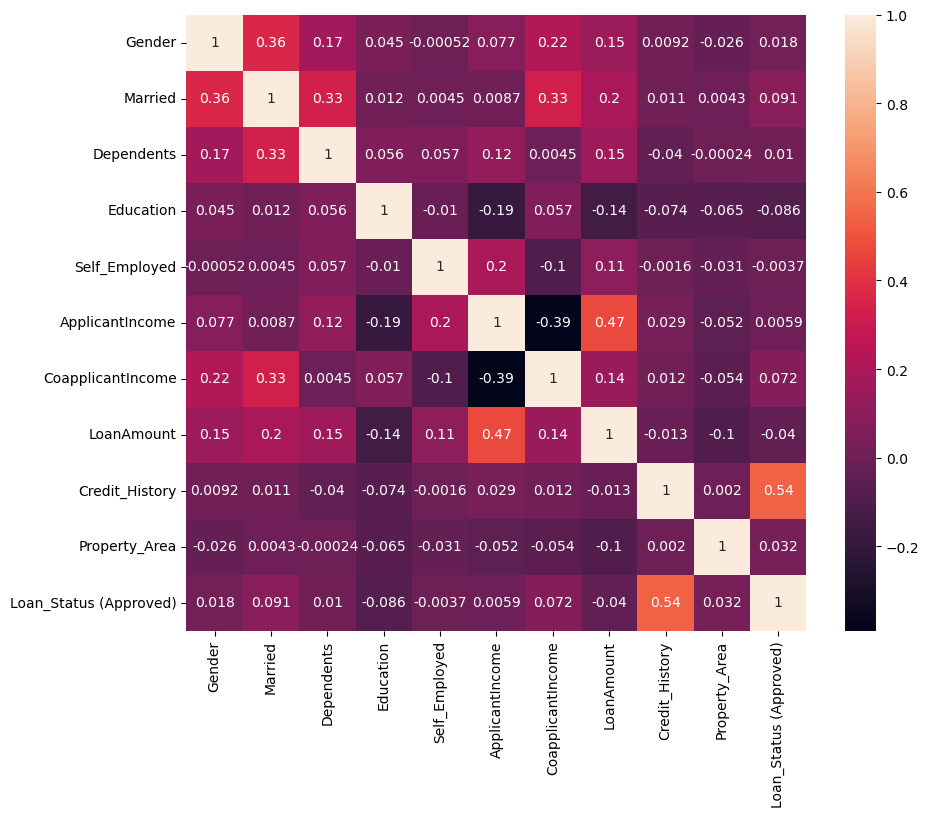

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)

In [98]:
res = df.corr()
res

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status (Approved)
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.077421,0.222485,0.152201,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.008661,0.329730,0.196261,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.121454,0.004514,0.153782,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.187696,0.056877,-0.144793,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.199372,-0.099552,0.106070,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.077421,0.008661,0.121454,-0.187696,0.199372,1.000000,-0.390040,0.473159,0.029324,-0.051869,0.005933
CoapplicantIncome,0.222485,0.329730,0.004514,0.056877,-0.099552,-0.390040,1.000000,0.144106,0.011756,-0.054084,0.072263
LoanAmount,0.152201,0.196261,0.153782,-0.144793,0.106070,0.473159,0.144106,1.000000,-0.013024,-0.099658,-0.040346
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.029324,0.011756,-0.013024,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.051869,-0.054084,-0.099658,0.001963,1.000000,0.032112


In [99]:
#Multicolinearity
res[res > 0.8]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status (Approved)
Gender,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
CoapplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
LoanAmount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Property_Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [103]:
#Correlation
res[res > 0.9]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status (Approved)
Gender,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
CoapplicantIncome,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
LoanAmount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Property_Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


### 7. DATA SPLITTING

In [106]:
# Splitting x and y
X = df.drop('Loan_Status (Approved)', axis = 1)
Y = df['Loan_Status (Approved)']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [110]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [112]:
X_train.shape

(491, 10)

In [114]:
X_test.shape

(123, 10)

In [116]:
Y_train.shape

(491,)

In [118]:
Y_test.shape

(123,)

### SMOTE

In [121]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(X_train,Y_train)

In [123]:
from collections import Counter

print("Class distribution before SMOTE:", Counter(Y_train))
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution before SMOTE: Counter({1: 342, 0: 149})
Class distribution after SMOTE: Counter({0: 342, 1: 342})


### 8. MODEL CREATION

#### 8.1. LOGISTIC REGRESSION

In [127]:
log_model=LogisticRegression(class_weight='balanced',random_state=42)
log_model.fit(x_train_smote,y_train_smote)
y_pred=log_model.predict(X_test)
print(f' log_accuracy_score :{accuracy_score(Y_test,y_pred)}\n')
print(f' log_confusion_matrix :{confusion_matrix(Y_test,y_pred)}\n')
print(f' log_classification_report :{classification_report(Y_test,y_pred)}')
log_accuracy=accuracy_score(Y_test,y_pred)

 log_accuracy_score :0.8048780487804879

 log_confusion_matrix :[[22 21]
 [ 3 77]]

 log_classification_report :              precision    recall  f1-score   support

           0       0.88      0.51      0.65        43
           1       0.79      0.96      0.87        80

    accuracy                           0.80       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.82      0.80      0.79       123



#### 8.2. DECISION TREE

In [130]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train_smote,y_train_smote)
y_pred=dt_model.predict(X_test)
print(f' dt_accuracy_score :{accuracy_score(Y_test,y_pred)}\n')
print(f' dt_confusion_matrix :{confusion_matrix(Y_test,y_pred)}\n')
print(f' dt_classification_report :{classification_report(Y_test,y_pred)}')

 dt_accuracy_score :0.6991869918699187

 dt_confusion_matrix :[[22 21]
 [16 64]]

 dt_classification_report :              precision    recall  f1-score   support

           0       0.58      0.51      0.54        43
           1       0.75      0.80      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.69       123



#### 8.2.1. HYPERPARAMETER TUNING FOR DECISION TREE

In [133]:
params={'criterion':('gini','entropy'),
        'splitter':('best','random'),
        'max_depth':(list(range(1,5))),
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':(list(range(1,5)))}

In [135]:
dt_hpt_model=DecisionTreeClassifier()

In [137]:
dt_cv = GridSearchCV(
    estimator=dt_hpt_model,
    param_grid=params,         
    scoring='accuracy',
    n_jobs=-1,
    verbose=3,
    cv=5
)

In [139]:
dt_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=3)

In [141]:
print(f'Best_Params:{dt_cv.best_params_}')

Best_Params:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [143]:
best_dt = dt_cv.best_estimator_
dt_hp_pred = best_dt.predict(X_test)
dt_hp_accuracy = accuracy_score(Y_test, dt_hp_pred)
print(f"Test Accuracy: {dt_hp_accuracy}")
dt_cr=classification_report(Y_test,dt_hp_pred)
print(dt_cr)
dt_cm=confusion_matrix(Y_test,dt_hp_pred)
print(dt_cm)

Test Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


#### 8.3. RANDOM FOREST

In [146]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train_smote,y_train_smote)
y_pred=rf_model.predict(X_test)
print(f' rf_accuracy_score :{accuracy_score(Y_test,y_pred)}\n')
print(f' rf_confusion_matrix :{confusion_matrix(Y_test,y_pred)}\n')
print(f' rf_classification_report :{classification_report(Y_test,y_pred)}')

 rf_accuracy_score :0.7479674796747967

 rf_confusion_matrix :[[20 23]
 [ 8 72]]

 rf_classification_report :              precision    recall  f1-score   support

           0       0.71      0.47      0.56        43
           1       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



#### 8.3.1. HYPERPARAMETER TUNING FOR RANDOM FOREST

In [149]:
params={'n_estimators':[100,150,200],
        'max_features':['auto','log2','sqrt'],
        'max_depth':list(range(1,5)),
        'min_samples_split':list(range(1,5)),
        'min_samples_leaf':[1,2,3,4]
       }

rf_hpt_model=RandomForestClassifier()
RF_CV= GridSearchCV(estimator=rf_hpt_model,
                   param_grid=params,
                   scoring='accuracy',
                   cv=3,
                   verbose=3,
                   n_jobs=-1
                  )

RF_CV.fit(x_train_smote,y_train_smote)
print(f'Best_Params:{RF_CV.best_params_}')

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Best_Params:{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [150]:
best_rf = RF_CV.best_estimator_
rf_hp_pred = best_rf.predict(X_test)
rf_hp_accuracy = accuracy_score(Y_test, rf_hp_pred)
print(f"Test Accuracy: {rf_hp_accuracy}")
rf_cr=classification_report(Y_test,rf_hp_pred)
print(rf_cr)
rf_cm=confusion_matrix(Y_test,rf_hp_pred)
print(rf_cm)

Test Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123

[[20 23]
 [ 5 75]]


#### 8.4. GRADIENT BOOSTING

In [154]:
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train_smote,y_train_smote)
y_pred=gb_model.predict(X_test)
print(f' gb_accuracy_score :{accuracy_score(Y_test,y_pred)}\n')
print(f' gb_confusion_matrix :{confusion_matrix(Y_test,y_pred)}\n')
print(f' gb_classification_report :{classification_report(Y_test,y_pred)}')
gb_accuracy=accuracy_score(Y_test,y_pred)

 gb_accuracy_score :0.7398373983739838

 gb_confusion_matrix :[[18 25]
 [ 7 73]]

 gb_classification_report :              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



#### 8.5. K-NEAREST NEIGHBOR (KNN)

In [157]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_smote,y_train_smote)
y_pred=knn_model.predict(X_test)
print(f' knn_accuracy_score :{accuracy_score(Y_test,y_pred)}\n')
print(f' knn_confusion_matrix :{confusion_matrix(Y_test,y_pred)}\n')
print(f' knn_classification_report :{classification_report(Y_test,y_pred)}')
knn_accuracy=accuracy_score(Y_test,y_pred)

 knn_accuracy_score :0.6829268292682927

 knn_confusion_matrix :[[23 20]
 [19 61]]

 knn_classification_report :              precision    recall  f1-score   support

           0       0.55      0.53      0.54        43
           1       0.75      0.76      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.68      0.68      0.68       123



#### 8.6. SUPPORT VECTOR CLASSIFIER (SVC)

In [160]:
svm_model=SVC()
svm_model.fit(x_train_smote,y_train_smote)
y_pred=svm_model.predict(X_test)
print(f' svm_accuracy_score :{accuracy_score(Y_test,y_pred)}\n')
print(f' svm_confusion_matrix :{confusion_matrix(Y_test,y_pred)}\n')
print(f' svm_classification_report :{classification_report(Y_test,y_pred)}')
svc_accuracy=accuracy_score(Y_test,y_pred)

 svm_accuracy_score :0.7398373983739838

 svm_confusion_matrix :[[22 21]
 [11 69]]

 svm_classification_report :              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.77      0.86      0.81        80

    accuracy                           0.74       123
   macro avg       0.72      0.69      0.70       123
weighted avg       0.73      0.74      0.73       123



### 9. MODEL COMPARISON REPORT

In [163]:
# Creating a dictionary for models and their f1 scores
comparison_dict = {'Model': ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier','SVC'],
                   'accuracy_score': [log_accuracy,dt_hp_accuracy,rf_hp_accuracy,gb_accuracy,knn_accuracy,svc_accuracy]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                     Model  accuracy_score
        LogisticRegression        0.804878
    DecisionTreeClassifier        0.788618
    RandomForestClassifier        0.772358
GradientBoostingClassifier        0.739837
      KNeighborsClassifier        0.682927
                       SVC        0.739837


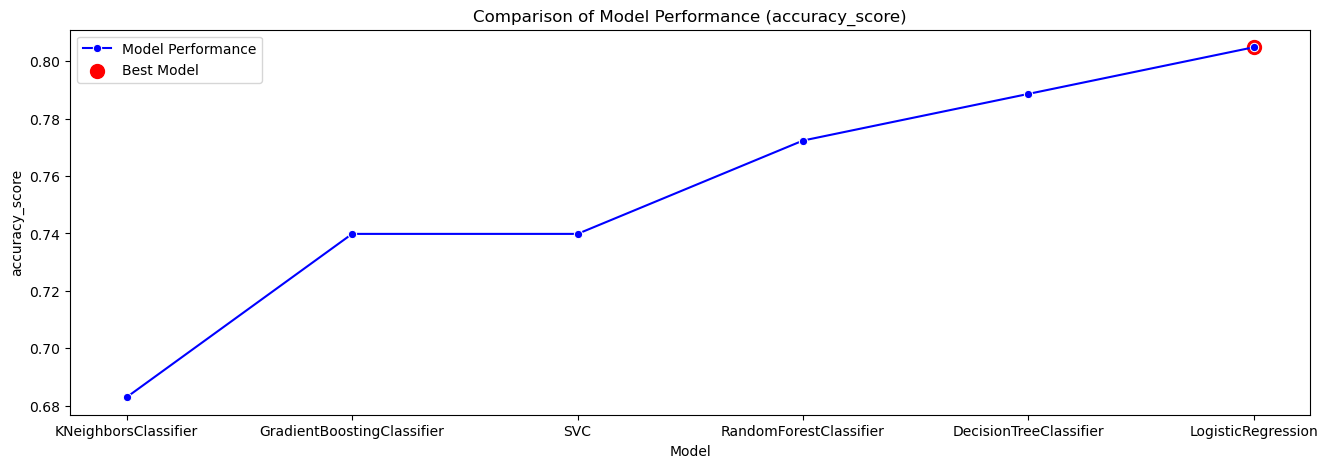

In [165]:
# Visualization
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

### 10. CONCLUSION
1. From the above lineplot, LogisticRegressionClassifier gives highest Accuracy Score which works well with this classifier problem compared to other models.

2. Among all the models, 'LogisticRegressionClassifier' has the highest predictive performance. Therefore, we can infer that 'LogisticRegressionClassifier' will be the most suitable model for the given dataset.


### ROC Curve for logestic Regression

In [264]:
# Get predicted probabilities for the positive class
Py_pred = log_model.predict_proba(X_test)[:, 1]

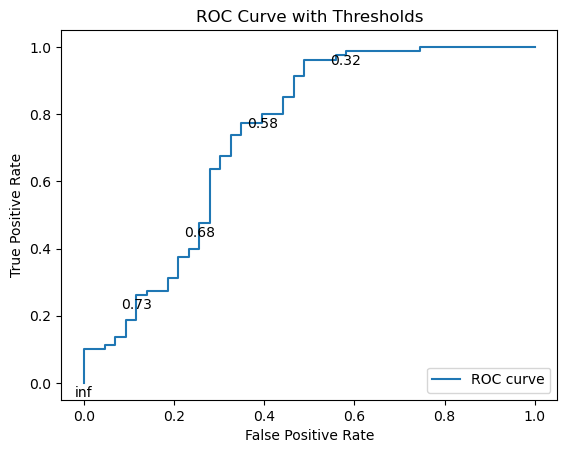

In [266]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test, Py_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Annotate threshold values on the plot
for i in range(0, len(thresholds), 10):
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]), 
                 textcoords="offset points", xytext=(0,-10), ha='center')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend(loc="lower right")
plt.show()

In [268]:
thresholds

array([       inf, 0.8574215 , 0.79750981, 0.79545672, 0.78013002,
       0.77911519, 0.7734816 , 0.77141568, 0.74648619, 0.74236813,
       0.72909475, 0.72367837, 0.7234564 , 0.71823569, 0.71531403,
       0.71345098, 0.70675859, 0.70525645, 0.70314174, 0.70063892,
       0.67863624, 0.67648588, 0.63027981, 0.62906384, 0.62375178,
       0.62273118, 0.60603182, 0.60494701, 0.5886691 , 0.58251657,
       0.57897135, 0.57440798, 0.56579222, 0.5583422 , 0.53619933,
       0.53303848, 0.50066232, 0.45676789, 0.43634891, 0.41958318,
       0.32325694, 0.04194488, 0.04032914, 0.01337406])

### AUC score for Logistic Regression

In [271]:
auc_score = roc_auc_score(Y_test, Py_pred)
print(f"AUC Score: {auc_score}")

AUC Score: 0.7383720930232558


In [273]:
# Use a custom threshold to classify
custom_threshold = 0.55
y_pred_custom_threshold = (Py_pred >= custom_threshold).astype(int)

# Evaluate the performance
accuracy = accuracy_score(Y_test, y_pred_custom_threshold)
print(f"Accuracy at threshold {custom_threshold}: {accuracy}")

Accuracy at threshold 0.55: 0.7479674796747967


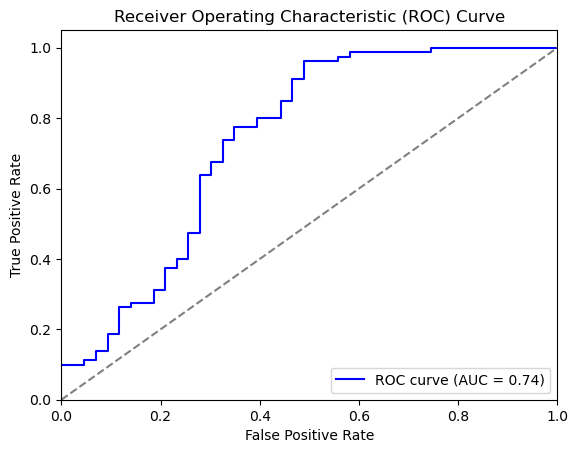

In [275]:
auc_score = roc_auc_score(Y_test, Py_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [293]:
#Final model
# Get predicted probabilities for class 1 (loan approved)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Applying chosen threshold (0.55)
threshold = 0.55
y_pred_custom = (y_pred_proba >= threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, y_pred_custom)
precision = precision_score(Y_test, y_pred_custom)
recall = recall_score(Y_test, y_pred_custom)
f1 = f1_score(Y_test, y_pred_custom)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.748
Precision: 0.775
Recall: 0.863
F1 Score: 0.817


## Deployment

In [296]:
#For deployment
import pickle

with open('loan_approval_model.pkl', 'wb') as file:
    pickle.dump(log_model, file)

#### For deployment use 

In [299]:
# Load model
with open('loan_approval_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use for prediction
probs = loaded_model.predict_proba(X_test)[:, 1]
preds = (probs >= 0.55).astype(int)


###  **Project Summary:** Loan Approval Prediction
This project aims to build a machine learning model that predicts whether a loan will be approved based on applicant and loan-related features. The workflow included comprehensive data analysis, preprocessing, feature engineering, model training, evaluation, and selection.

Steps Followed:

**Basic Data Checks & Cleaning:**

Loaded the dataset and reviewed structure, types, and missing values.

Removed irrelevant columns like Loan_ID.

**Exploratory Data Analysis (EDA):**

Analyzed feature distributions and relationships with the target variable.

Identified key factors influencing loan approval, such as Credit_History, Income, and Education.

**Data Preprocessing:**

Handled missing values using median/mode imputation.

Encoded categorical variables using LabelEncoder.

Scaled numerical features using StandardScaler for uniformity.

**Feature Selection:**

Removed irrelevant features and ensured input feature consistency.

Selected 11 important features for training.

**Imbalanced Data Handling:**

Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes and improve model performance on the minority class (loan not approved).

**Model Training & Evaluation:**

Trained and compared multiple machine learning models:

>Logistic Regression

>Decision Tree

>Random Forest

>Gradient Boosting

>KNN

>SVC

Evaluated models using:

>Accuracy

>Precision, Recall, F1-score

>Confusion Matrix


**Model Selection:**

Logistic Regression achieved the best accuracy of 80%, showing strong overall performance.

Chosen as the final model for deployment due to its balanced and reliable results.

Saved the final model using Pickle for future use.

**Outcome:**
Built a robust and balanced model capable of predicting loan approval status with good accuracy and recall on both classes.

Deployed-ready model stored as loan_approval_model.pkl.